# Exploratory Data Analysis on Haberman Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Importing dataset and checking it's basic information :

In [2]:
hb=pd.read_csv('habermans-survival-data-set/haberman.csv', names=['Age','Op_Year','axil_nodes','Surv_status'])
print('Shape : ',hb.shape)
print('Columns : ',hb.columns)
print(hb.head())

Shape :  (306, 4)
Columns :  Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')
   Age  Op_Year  axil_nodes  Surv_status
0   30       64           1            1
1   30       62           3            1
2   30       65           0            1
3   31       59           2            1
4   31       65           4            1


The dataset has 306 rows and 4 columns.
The columns are Age, Op_Year, axil_nodes and Surv_status.

## Critical information from dataset :
Surv_status of 1 means patient survived >= 5 years and 2 means patient died in < 5 years.
Op_year signifies year of operation, Age is age of patient at operation and axil_nodes is the number of positive axilliary nodes detected.

Survival status can be used as the class on which classification can be performed.

In [3]:
print(hb['Surv_status'].value_counts())

1    225
2     81
Name: Surv_status, dtype: int64


It is seen that this is not a balanced dataset, the records for survival class 2(81) are very few as compared to records for survival class 1(225).

## Statistics of Haberman dataset

In [4]:
print(hb.describe())

              Age     Op_Year  axil_nodes  Surv_status
count  306.000000  306.000000  306.000000   306.000000
mean    52.457516   62.852941    4.026144     1.264706
std     10.803452    3.249405    7.189654     0.441899
min     30.000000   58.000000    0.000000     1.000000
25%     44.000000   60.000000    0.000000     1.000000
50%     52.000000   63.000000    1.000000     1.000000
75%     60.750000   65.750000    4.000000     2.000000
max     83.000000   69.000000   52.000000     2.000000


#### No. of points = 306;
#### No. of features = 4;
#### No. of classes = 2 (Surv_status 1 or 2);
#### No. of points in Surv_status(1) = 225;
#### No. of points in Surv_status(2) = 81;

# Objective : 
To do an exploratory data analysis on the Haberman dataset to visualise and quantify differences in the features provided and to successfully identify features involved in determining the survivability of patients.

# Univariate Analysis : 

In [5]:
# Analysis on age :
surv_1=hb.loc[hb['Surv_status']==1]    #Dataset having class 1
surv_2=hb.loc[hb['Surv_status']==2]    #Dataset having class 2
print(surv_1.shape, surv_2.shape)

(225, 4) (81, 4)


## Checking for independet features of survival class 1 and 2 :

In [6]:
print(surv_1.describe())
print(surv_2.describe())

              Age     Op_Year  axil_nodes  Surv_status
count  225.000000  225.000000  225.000000        225.0
mean    52.017778   62.862222    2.791111          1.0
std     11.012154    3.222915    5.870318          0.0
min     30.000000   58.000000    0.000000          1.0
25%     43.000000   60.000000    0.000000          1.0
50%     52.000000   63.000000    0.000000          1.0
75%     60.000000   66.000000    3.000000          1.0
max     77.000000   69.000000   46.000000          1.0
             Age    Op_Year  axil_nodes  Surv_status
count  81.000000  81.000000   81.000000         81.0
mean   53.679012  62.827160    7.456790          2.0
std    10.167137   3.342118    9.185654          0.0
min    34.000000  58.000000    0.000000          2.0
25%    46.000000  59.000000    1.000000          2.0
50%    53.000000  63.000000    4.000000          2.0
75%    61.000000  65.000000   11.000000          2.0
max    83.000000  69.000000   52.000000          2.0


For both the classes, the mean of age and operation year is almost the same, but the mean number of axil nodes vary a lot(2 and 7 for classes 1 and 2).

## Plotting histograms for all three features : age, operation year and axil nodes :

### Histogram for feature age for survival class 1 and 2 :

/home/ibab/Bioinformatics_Softwares/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ibab/Bioinformatics_Softwares/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


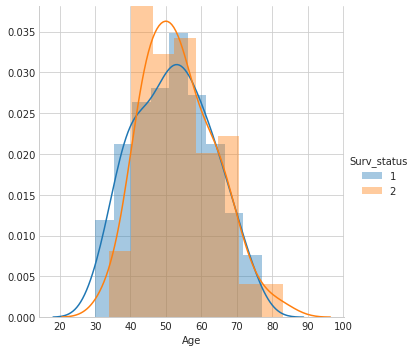

In [7]:
#Plotting histograms to visualise features and their variability in different classes
sns.set_style('whitegrid')
sns.FacetGrid(hb, hue='Surv_status', size=5).map(sns.distplot,'Age').add_legend()

It can be observed that for suvival status 2 class, the distribution has a peak at age 50 and looks like a normal distribution. While survival class 1 curve has a peak >50 and <60 years of age. T?he heights of both peaks are similar, but class 2 peak is a bit taller than that of class 1. However, the histograms for age are highly overlapping for both classes and do not provide grounds for classification.

### Histogram for feature operation year for survival class 1 and 2 :

/home/ibab/Bioinformatics_Softwares/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ibab/Bioinformatics_Softwares/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


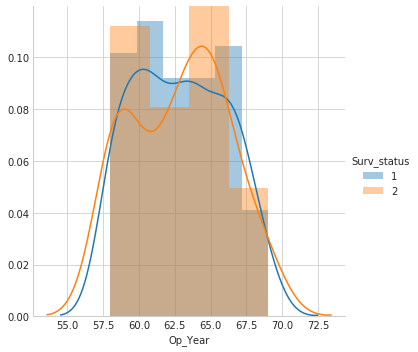

In [8]:
sns.set_style('whitegrid')
sns.FacetGrid(hb, hue='Surv_status', size=5).map(sns.distplot,'Op_Year').add_legend()

The histograms of op_year for class 2 shows 2 peaks - 1st between 57.5 and 60 and the second between 65 and 67.5 . Class 1 has a peak at around 60 but drags onto around 67.5 . However, the histograms for operation year are also highly overlapping for both classes and do not provide grounds for classification. 

### Plotting histograms for feature axil nodes for survival class 1 and 2 :

/home/ibab/Bioinformatics_Softwares/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ibab/Bioinformatics_Softwares/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


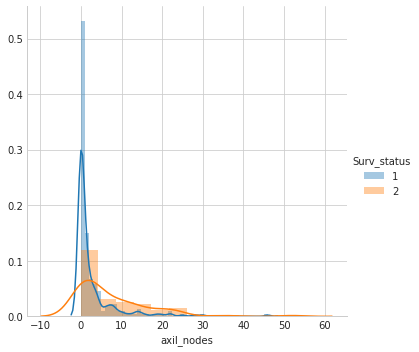

In [9]:
sns.set_style('whitegrid')
sns.FacetGrid(hb, hue='Surv_status', size=5).map(sns.distplot,'axil_nodes').add_legend()

It can be observed from the histograms for axil nodes of both classes that class 1 has a peak at 0-1 and the peak sharply falls after that, class 2 has a peak after 1 and shows a more broad distribution than class 1.

The histograms for age and operation year are highly overlapping for both classes and do not provide grounds for classification. However some speration between classes is seen for the axil nodes histogram, where survival class 1 has a long peak at around 0, survival class 2 has a short and broad peak at around 3.

## Plotting the probability and cumulative distribution function for all the three features for comparisons between classes 1 and 2 :

### PDF and CDF of the feature age for survival classes 1 and 2 :

Text(0,0.5,'Probability Density')

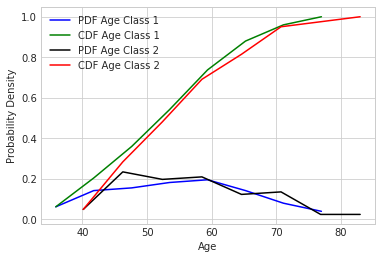

In [24]:
#Taking Age as variable and finding pdf and cdf for both classes
#For class 1
age_counts1, age_bin_edges1=np.histogram(surv_1['Age'], bins=8, density=True)
age_pdf1=age_counts1/sum(age_counts1)
age_cdf1=np.cumsum(age_pdf1)
plt.plot(age_bin_edges1[1:], age_pdf1, 'b', label='PDF Age Class 1') #Blue color
plt.plot(age_bin_edges1[1:], age_cdf1, 'g', label='CDF Age Class 1') #Green color
#For class 2
age_counts2, age_bin_edges2=np.histogram(surv_2['Age'], bins=8, density=True)
age_pdf2=age_counts2/sum(age_counts2)
age_cdf2=np.cumsum(age_pdf2)
plt.plot(age_bin_edges2[1:], age_pdf2, 'k', label='PDF Age Class 2') #Black color
plt.plot(age_bin_edges2[1:], age_cdf2, 'r', label='CDF Age Class 2') #Red color
plt.legend()
plt.xlabel('Age')
plt.ylabel('Probability Density')

It can be seen that for the age variable, the pdf and cdf for classes 1 and 2 are highly similar. The pdf for class 2 age is not as smooth as class 1 and starts at 40 ends at 85, but pdf of age of class 1 starts around 20 and ends below 80. This difference is not significant.

### PDF and CDF of the feature operation year for survival classes 1 and 2 :

Text(0,0.5,'Probability Density')

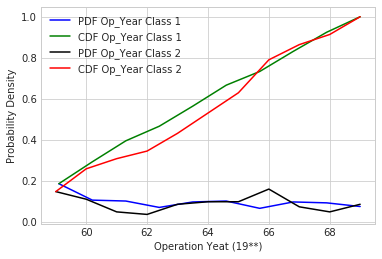

In [25]:
#Taking Op_Year as variable and finding pdf and cdf for both classes
#For class 1
op_counts1, op_bin_edges1=np.histogram(surv_1['Op_Year'], bins=10, density=True)
op_pdf1=op_counts1/sum(op_counts1)
op_cdf1=np.cumsum(op_pdf1)
plt.plot(op_bin_edges1[1:], op_pdf1, 'b', label='PDF Op_Year Class 1') #Blue color
plt.plot(op_bin_edges1[1:], op_cdf1, 'g', label='CDF Op_Year Class 1') #Green color
#For class 2
op_counts2, op_bin_edges2=np.histogram(surv_2['Op_Year'], bins=11, density=True)
op_pdf2=op_counts2/sum(op_counts2)
op_cdf2=np.cumsum(op_pdf2)
plt.plot(op_bin_edges2[1:], op_pdf2, 'k', label='PDF Op_Year Class 2') #Black color
plt.plot(op_bin_edges2[1:], op_cdf2, 'r', label='CDF Op_Year Class 2') #Red color
plt.legend()
plt.xlabel('Operation Yeat (19**)')
plt.ylabel('Probability Density')

It can be seen that for the operation year variable, the pdf and cdf for classes 1 and 2 are highly similar. This difference is not significant for effective classification.

### PDF and CDF of the feature axil nodes for survival classes 1 and 2 :

Text(0,0.5,'Probability Density')

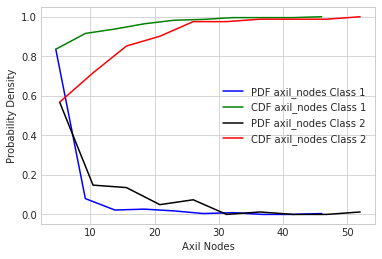

In [26]:
#Taking axil_nodes as variable and finding pdf and cdf for both classes
#For class 1
an_counts1, an_bin_edges1=np.histogram(surv_1['axil_nodes'], bins=10, density=True)
an_pdf1=an_counts1/sum(an_counts1)
an_cdf1=np.cumsum(an_pdf1)
plt.plot(an_bin_edges1[1:], an_pdf1, 'b', label='PDF axil_nodes Class 1') #Blue color
plt.plot(an_bin_edges1[1:], an_cdf1, 'g', label='CDF axil_nodes Class 1') #Green color
#For class 2
an_counts2, an_bin_edges2=np.histogram(surv_2['axil_nodes'], bins=10, density=True)
an_pdf2=an_counts2/sum(an_counts2)
an_cdf2=np.cumsum(an_pdf2)
plt.plot(an_bin_edges2[1:], an_pdf2, 'k', label='PDF axil_nodes Class 2') #Black color
plt.plot(an_bin_edges2[1:], an_cdf2, 'r', label='CDF axil_nodes Class 2') #Red color
plt.legend()
plt.xlabel('Axil Nodes')
plt.ylabel('Probability Density')

It can be seen that for the axil nodes variable, the pdf and cdf for classes 1 and 2 are different and could be further investigated. The pdf for class 1 drops sharply between 0 and 10, and after 10 it drops to nearly 0, showing that most of the patients of survival class 1 have less than 10 axil nodes. The pdf for class 2 also has a sharp drop before 10 but approaches 0 at around 30 axil nodes.

## 5.4 Analysis of quantiles of variables using boxplots and violin plots :

### Boxplot for feature age for classes 1 and 2 :

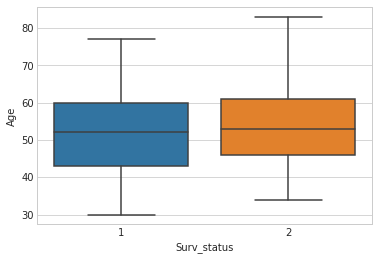

In [13]:
# Plotting box plot for the variable age
sns.boxplot(x='Surv_status', y='Age', data=hb)

The boxplots of the variable age are quite similar for both of the survival classes 1 and 2 in terms of meadian and all other quartiles. This variable alone cannot be used to classify the patients to their respective classes.

### Violin plot for feature age for classes 1 and 2 : 

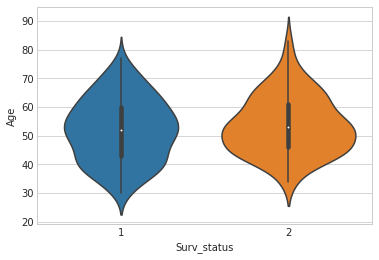

In [14]:
# Plotting violin plot for the variable age
sns.violinplot(x='Surv_status', y='Age', data=hb)

The violin plots of the variable age are very similar for both of the survival classes 1 and 2 in terms of meadian and all other quartiles, but differ a little bit in their distribution. This variable alone cannot be used to classify the patients to their respective classes.

### Boxplot for feature operation year for classes 1 and 2 : 

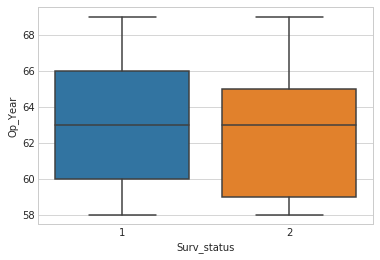

In [15]:
# Plotting box plot for the variable Op_Year
sns.boxplot(x='Surv_status', y='Op_Year', data=hb)

The boxplots of the variable operation year have means at similar levels, but the 25th and 75th quartile differ for both.

### Violin plot for feature operation year for classes 1 and 2 : 

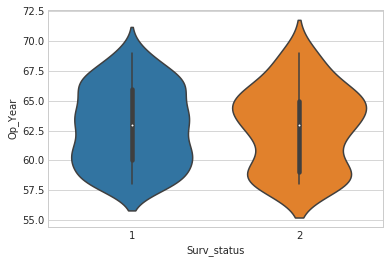

In [16]:
# Plotting violin plot for the variable Op_Year
sns.violinplot(x='Surv_status', y='Op_Year', data=hb)

The violin plots for variable op_year differ both in their quartiles and their distributions, but these are marginal differences and not very effective for use in classification on the basis of class.

### Boxplot for feature axil nodes for classes 1 and 2 :

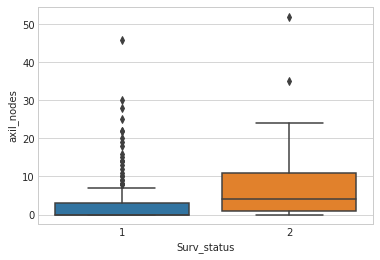

In [17]:
# Plotting box plot for the variable axil_nodes
sns.boxplot(x='Surv_status', y='axil_nodes', data=hb)

From the boxplot of axil nodes it can be inferred that 75% of the patients that survived (class 1) had less than 3 axil nodes. For the patients that did not survive (class 2) have a median at 4, i.e. 50% patients of survival class 2 had more than 4 axil nodes.

#### Further information on the 0th - 100th percentile for the fearure axil_nodes for classes 1 and 2

In [18]:
print('Quantiles for survival class 1 : ', np.percentile(surv_1['axil_nodes'], np.arange(0,125,25)))
print('Quantiles for survival class 2 : ', np.percentile(surv_2['axil_nodes'], np.arange(0,125,25)))

Quantiles for survival class 1 :  [ 0.  0.  0.  3. 46.]
Quantiles for survival class 2 :  [ 0.  1.  4. 11. 52.]


### Violin plot for feature axil nodes for classes 1 and 2 :

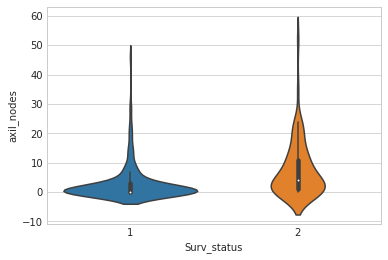

In [19]:
# Plotting violin plot for the variable axil_nodes
sns.violinplot(x='Surv_status', y='axil_nodes', data=hb)

The violin plots for variable axil nodes shoes a broad distribution for class 2 which is right-tailed and a small and high-peaked distribution for class 1.

# Bivariate Analysis :

## Pair-plots for fearures age, operation year and axil nodes :

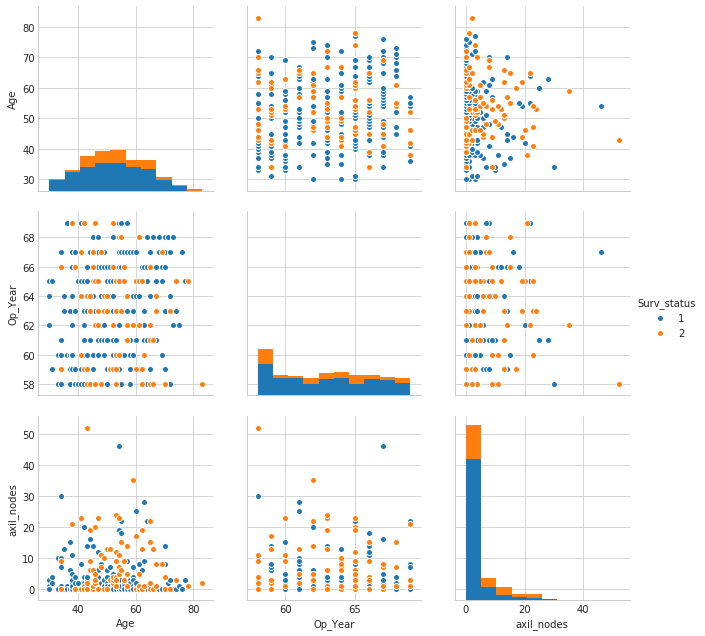

In [20]:
sns.set_style('whitegrid')
sns.pairplot(hb, hue='Surv_status', vars=['Age', 'Op_Year', 'axil_nodes'], size=3)

### Observations :
It can be seen that only axil_node vs axil_node pair plot provides some means of separation between survival classes 1 and 2 (still not adequate, but more than any other combination).
Simple if-else condtions cannot be used to classify records.

## Plotting 2-D density plots to further analyze the feature axil nodes :

### 2-D density plot for axil_nodes vs axil_nodes for class 1 :

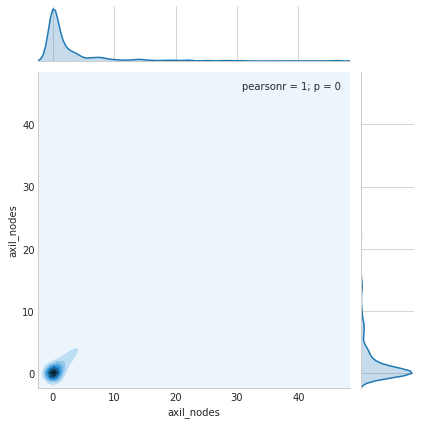

In [21]:
sns.jointplot(x='axil_nodes', y='axil_nodes', data=hb[hb['Surv_status']==1], kind='kde')

### 2-D density plot for axil_nodes vs axil_nodes for class 2 :

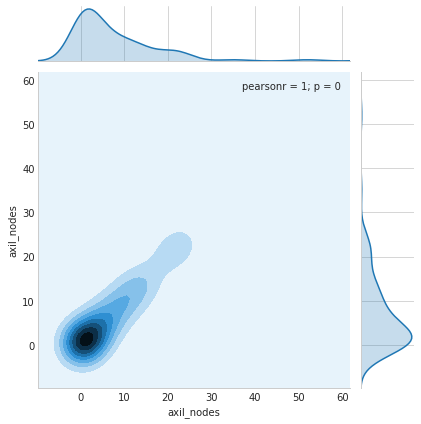

In [22]:
sns.jointplot(x='axil_nodes', y='axil_nodes', data=hb[hb['Surv_status']==2], kind='kde')

From the above 2-D density plots it is observed that the plot for class 1 shows high density at around 0,0 and for survival class 2 the high density is at around 1,1 and the density plot leads on much further then that of class 1.

# Results :
### After performing an exploratory data analysis on the Haberman's dataset it was inferred that :
1. Features age and operation year wer highly overlapping and did not provide significant grounds for classification
2. Feature axil nodes showed some differences between the two survival classes wherein 75% of the patients in class 1 had <= 3 axil nodes. While more than 50% of the class 2 patients had >=4 axil nodes.
3. Combinations of these 3 features among themselves (pair-plots) did not reveal any significant grounds for classification, except axil_nodes vs axil_nodes which gives some separation.
4. 2-D density plots for classes 1 and 2 for the feature axil_nodes vs axil_nodes is able to visualise that the amount of axil nodes of class 1 are restricted to a very small space and that of class 2 is much more elongated.